# Convert Bylot forcing files to CLASSIC
https://cccma.gitlab.io/classic/makeInputFiles.html

In [1]:
# Env: sc2_v0

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
import os

## Bylot Island, Canadian high Arctic

The site is a low-center polygon, with herb tundra and no erect vegetation

| Short name | byl |
|:-----------|:----|
| Location | 73.1504ºN, 80.0046ºW |
| Elevation | 25 m |
| Snow-free albedo | - |
| Simulation period | 11 July 2013 to 25 June 2019 |
| Temperature/humidity measurement height | 2.3 m |
| Wind measurement height | 2.3 m |
| Reference | Domine et al. ([2021](https://essd.copernicus.org/articles/13/4331/2021/)) |

In [2]:
site = 'byl'

year_start = '2013'
year_end = '2019'

lat = 73.1504
lon = -80.0046

path = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Bylot'
path_tmp = '/home/lalandmi/Dropbox/data/SnowMIP/forcing/CLASSIC/tmp'
path_out = '/home/lalandmi/Dropbox/data/SnowMIP/forcing/CLASSIC/'+site
path_out_CLASSIC = '/home/lalandmi/eccc/classic-develop/inputFiles/SnowArctic/'+site+'/forcing'

if os.path.exists(path_out):
    print(path_out+' already exist.')
else:
    os.makedirs(path_out)
    print(path_out+' has been created!')

if os.path.exists(path_out_CLASSIC):
    print(path_out_CLASSIC+' already exist.')
else:
    os.makedirs(path_out_CLASSIC)
    print(path_out_CLASSIC+' has been created!')

/home/lalandmi/Dropbox/data/SnowMIP/forcing/CLASSIC/byl already exist.
/home/lalandmi/eccc/classic-develop/inputFiles/SnowArctic/byl/forcing already exist.


### Open original forcing file

In [3]:
# ds = xr.open_dataset(path+'/met_insitu_'+site+'_'+year_start+'_'+year_end+'.nc')
# ds

<xarray.Dataset>
Dimensions:  (time: 52202)
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00
Data variables:
    Wind     (time) float64 ...
    Tair     (time) float64 ...
    Qair     (time) float64 ...
    LWdown   (time) float64 ...
    SWdown   (time) float64 ...
    Psurf    (time) float64 ...
    Rainf    (time) float64 ...
    Snowf    (time) float64 ...

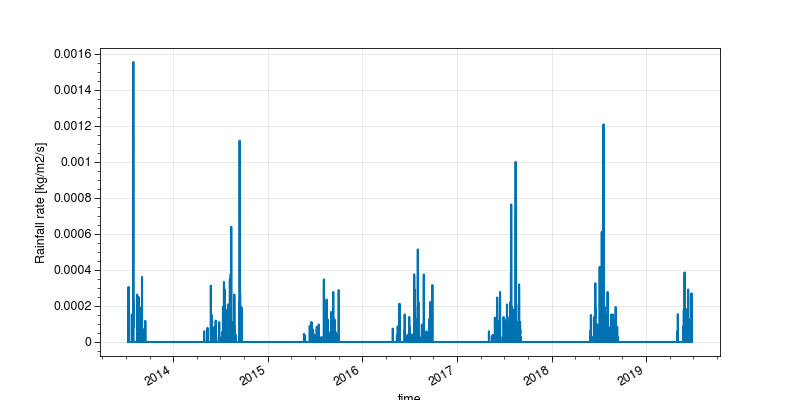

In [4]:
# %matplotlib widget
# ds.Rainf.plot(figsize=(8,4))

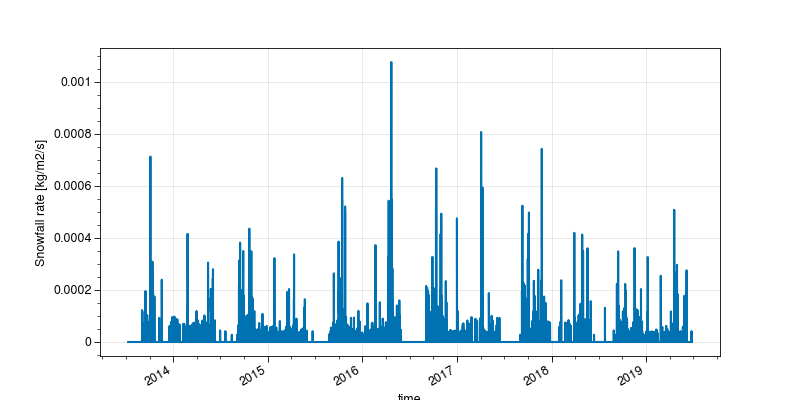

In [5]:
# %matplotlib widget
# ds.Snowf.plot(figsize=(8,4))

In [4]:
# ds.time.encoding

{'zlib': False,
 'szip': False,
 'zstd': False,
 'bzip2': False,
 'blosc': False,
 'shuffle': False,
 'complevel': 0,
 'fletcher32': False,
 'contiguous': True,
 'chunksizes': None,
 'source': '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Bylot/met_insitu_byl_1.3SWd_2013_2019.nc',
 'original_shape': (52202,),
 'dtype': dtype('int64'),
 'units': 'hours since 2013-07-11 09:00:00',
 'calendar': 'proleptic_gregorian'}

In [5]:
# Check if there are leap years
# ds.sel(time='2016-02')

<xarray.Dataset>
Dimensions:  (time: 696)
Coordinates:
  * time     (time) datetime64[ns] 2016-02-01 ... 2016-02-29T23:00:00
Data variables:
    Wind     (time) float64 ...
    Tair     (time) float64 ...
    Qair     (time) float64 ...
    LWdown   (time) float64 ...
    SWdown   (time) float64 ...
    Psurf    (time) float64 ...
    Rainf    (time) float64 ...
    Snowf    (time) float64 ...

### Slice file to full years (as CLASSIC expect only full years)
It is not required as long as you only use the full years in the job file

In [6]:
# year_start_full = str(int(year_start) + 1)
# year_end_full = str(int(year_end) - 1)

# ds_subset = ds.sel(time=slice(year_start_full, year_end_full))
# ds_subset

<xarray.Dataset>
Dimensions:  (time: 43824)
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01 ... 2018-12-31T23:00:00
Data variables:
    Wind     (time) float64 ...
    Tair     (time) float64 ...
    Qair     (time) float64 ...
    LWdown   (time) float64 ...
    SWdown   (time) float64 ...
    Psurf    (time) float64 ...
    Rainf    (time) float64 ...
    Snowf    (time) float64 ...

In [7]:
# ds_subset.to_netcdf(path_tmp+'/met_insitu_'+site+'_ERA5precip_'+year_start_full+'_'+year_end_full+'.nc')

### Convert time from relative to absolute
https://sourceforge.net/p/nco/discussion/9830/thread/175b4c98e1/?limit=25

The time format `day as %Y%m%d.%f` is <mark>**required** by CLASSIC</mark>

Note: you need CDO installed to run the next cell (`!` allow to run bash command in the notebook)

In [8]:
# !cdo -a -f nc copy {path_tmp}/met_insitu_{site}_ERA5precip_{year_start_full}_{year_end_full}.nc {path_tmp}/met_insitu_{site}_ERA5precip_{year_start_full}_{year_end_full}_a.nc

cdo    copy:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    copy: Processed 350592 values from 8 variables over 43824 timesteps [3.52s 191MB]


## Open the new file with absolute time

In [3]:
year_start_full = str(int(year_start) + 1)
year_end_full = str(int(year_end) - 1)
ds = xr.open_dataset(path_tmp+'/met_insitu_'+site+'_'+year_start_full+'_'+year_end_full+'_a.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 43824)
Coordinates:
  * time     (time) float64 2.014e+07 2.014e+07 ... 2.018e+07 2.018e+07
Data variables:
    Wind     (time) float64 ...
    Tair     (time) float64 ...
    Qair     (time) float64 ...
    LWdown   (time) float64 ...
    SWdown   (time) float64 ...
    Psurf    (time) float64 ...
    Rainf    (time) float64 ...
    Snowf    (time) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Feb 06 13:43:22 2024: cdo -a -f nc copy /home/lalandmi/...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

In [4]:
ds.time

<xarray.DataArray 'time' (time: 43824)>
array([20140101.      , 20140101.041667, 20140101.083333, ..., 20181231.875   ,
       20181231.916667, 20181231.958333])
Coordinates:
  * time     (time) float64 2.014e+07 2.014e+07 ... 2.018e+07 2.018e+07
Attributes:
    standard_name:  time
    units:          day as %Y%m%d.%f
    calendar:       proleptic_gregorian
    axis:           T

In [5]:
path_ERA5 = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all'
ds_ERA5 = xr.open_dataset(path_ERA5+'/Bylot/Bylot_ERA5_precip_2014-2018.nc')
ds_ERA5

<xarray.Dataset>
Dimensions:    (longitude: 9, latitude: 9, time: 43824)
Coordinates:
  * longitude  (longitude) float32 -81.0 -80.75 -80.5 ... -79.5 -79.25 -79.0
  * latitude   (latitude) float32 74.0 73.75 73.5 73.25 ... 72.5 72.25 72.0
  * time       (time) datetime64[ns] 2014-01-01 ... 2018-12-31T23:00:00
Data variables:
    sf         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-09 22:39:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

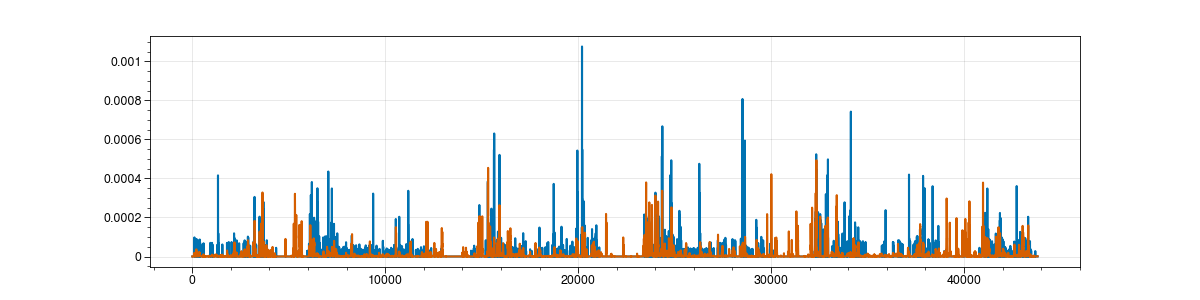

In [6]:
%matplotlib widget
plt.figure(figsize=(12,3))
plt.plot(ds.Snowf.values)
plt.plot(( ds_ERA5.sf/3600*1e3 ).sel(latitude=lat, longitude=lon, method='nearest').values)

In [30]:
ds_ERA5.sf

<xarray.DataArray 'sf' (time: 43824, latitude: 9, longitude: 9)>
array([[[8.385046e-06, 8.385046e-06, ..., 6.239046e-06, 6.000628e-06],
        [8.941395e-06, 8.385046e-06, ..., 5.046837e-06, 5.643000e-06],
        ...,
        [9.536743e-07, 1.072884e-06, ..., 7.550698e-07, 5.960464e-07],
        [5.960464e-07, 9.934884e-07, ..., 8.742791e-07, 5.165348e-07]],

       [[8.265721e-06, 8.265721e-06, ..., 6.199349e-06, 5.960930e-06],
        [8.623465e-06, 8.027302e-06, ..., 5.245558e-06, 6.080139e-06],
        ...,
        [7.152557e-07, 7.152557e-07, ..., 7.152557e-07, 4.768372e-07],
        [1.589069e-07, 4.768372e-07, ..., 8.742791e-07, 5.165348e-07]],

       ...,

       [[3.814930e-06, 2.742046e-06, ..., 4.172558e-06, 4.411093e-06],
        [4.887930e-06, 1.072884e-06, ..., 8.106814e-06, 7.391558e-06],
        ...,
        [1.072884e-06, 1.788256e-06, ..., 2.205535e-05, 3.516942e-05],
        [1.072884e-06, 1.192209e-06, ..., 2.587039e-05, 3.946130e-05]],

       [[3.497000e-06, 2.543326e-06, ..., 3.973953e-06, 4.093163e-06],
        [4.172558e-06, 9.536743e-07, ..., 8.702860e-06, 8.146511e-06],
        ...,
        [9.536743e-07, 1.788256e-06, ..., 2.563198e-05, 3.791146e-05],
        [1.351116e-06, 1.669046e-06, ..., 2.996356e-05, 4.224305e-05]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -81.0 -80.75 -80.5 ... -79.5 -79.25 -79.0
  * latitude   (latitude) float32 74.0 73.75 73.5 73.25 ... 72.5 72.25 72.0
  * time       (time) datetime64[ns] 2014-01-01 ... 2018-12-31T23:00:00
Attributes:
    units:          m of water equivalent
    long_name:      Snowfall
    standard_name:  lwe_thickness_of_snowfall_amount

In [25]:
ds.Snowf[:, 0, 0].values

array([0., 0., 0., ..., 0., 0., 0.])

In [7]:
ds.Snowf.values = ( ds_ERA5.sf*1e3/3600 ).sel(latitude=lat, longitude=lon, method='nearest').values

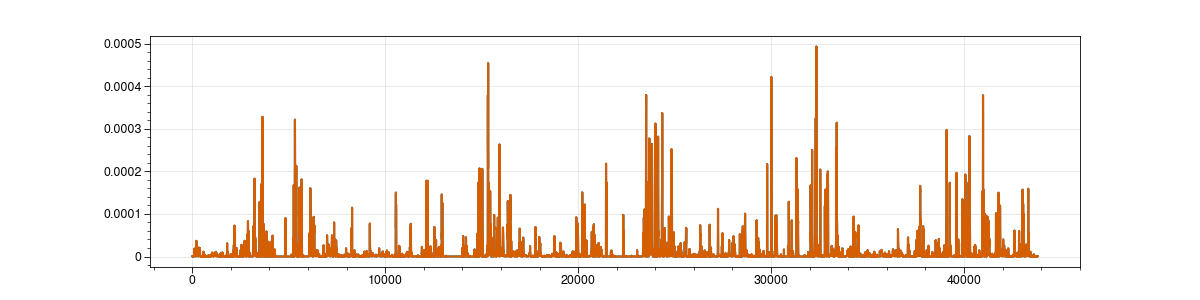

In [8]:
%matplotlib widget
plt.figure(figsize=(12,3))
plt.plot(ds.Snowf.values)
plt.plot(( ds_ERA5.sf/3600*1e3 ).sel(latitude=lat, longitude=lon, method='nearest').values)

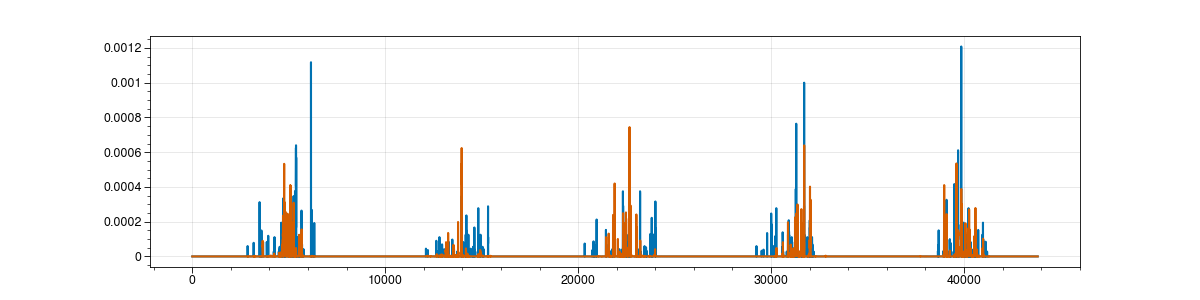

In [9]:
%matplotlib widget
plt.figure(figsize=(12,3))
plt.plot(ds.Rainf.values)
plt.plot(( (ds_ERA5.tp - ds_ERA5.sf)/3600*1e3 ).sel(latitude=lat, longitude=lon, method='nearest').values)

In [10]:
ds.Rainf.values = ( (ds_ERA5.tp - ds_ERA5.sf)*1e3/3600 ).sel(latitude=lat, longitude=lon, method='nearest').values

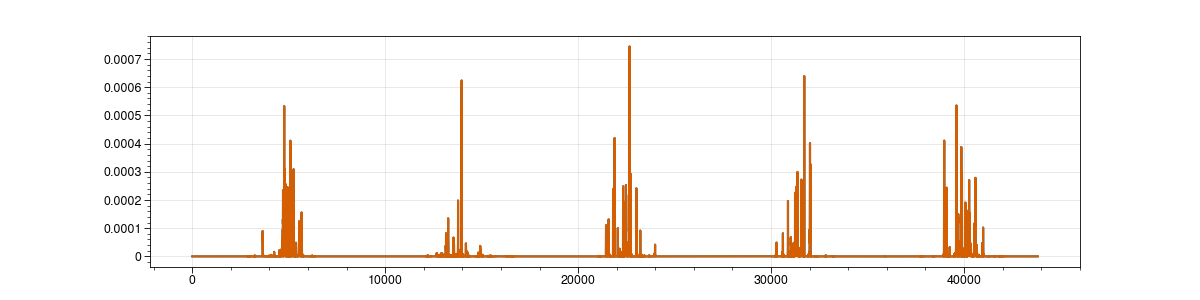

In [11]:
%matplotlib widget
plt.figure(figsize=(12,3))
plt.plot(ds.Rainf.values)
plt.plot(( (ds_ERA5.tp - ds_ERA5.sf)/3600*1e3 ).sel(latitude=lat, longitude=lon, method='nearest').values)

### Add the lat/lon dimensions of the site (<mark>required by CLASSIC</mark>)

Note: the values of the coordinates does not seem to matter for CLASSIC (the attributes neither)

In [12]:
ds = ds.assign_coords(lon=lon)
ds = ds.expand_dims('lon')
ds['lon'] = ds.lon.assign_attrs(
    standard_name='Longitude',
    units='degrees_east',
    axis='X'
)

ds = ds.assign_coords(lat=lat)
ds = ds.expand_dims('lat')
ds['lat'] = ds.lat.assign_attrs(
    standard_name='Latitude',
    units='degrees_north',
    axis='Y'
)

# Transpose the dimension to put the time first (as required by CLASSIC)
ds = ds.transpose('time', 'lat', 'lon')

ds

<xarray.Dataset>
Dimensions:  (time: 43824, lat: 1, lon: 1)
Coordinates:
  * time     (time) float64 2.014e+07 2.014e+07 ... 2.018e+07 2.018e+07
  * lon      (lon) float64 -80.0
  * lat      (lat) float64 73.15
Data variables:
    Wind     (time, lat, lon) float64 0.134 0.076 0.02 ... 1.327 1.632 0.369
    Tair     (time, lat, lon) float64 -39.72 -39.27 -37.01 ... -25.13 -28.13
    Qair     (time, lat, lon) float64 7.51e-05 7.82e-05 ... 0.0003428 0.0002744
    LWdown   (time, lat, lon) float64 162.2 162.3 165.5 ... 189.1 192.6 170.2
    SWdown   (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Psurf    (time, lat, lon) float64 1.012e+05 1.012e+05 ... 1.011e+05
    Rainf    (time, lat, lon) float32 1.64e-08 -7.189e-08 ... 8.844e-08
    Snowf    (time, lat, lon) float32 6.403e-07 7.285e-07 ... 7.065e-07
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Feb 06 13:43:22 2024: cdo -a -f nc copy /home/lalandmi/...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

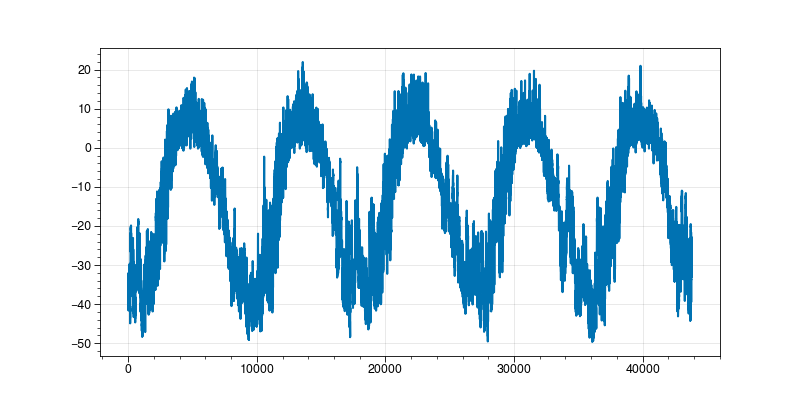

In [13]:
%matplotlib widget
plt.figure(figsize=(8,4))
plt.plot(ds.Tair.squeeze().values)

### Add Rainf and Snowf (<mark>required by CLASSIC</mark>)

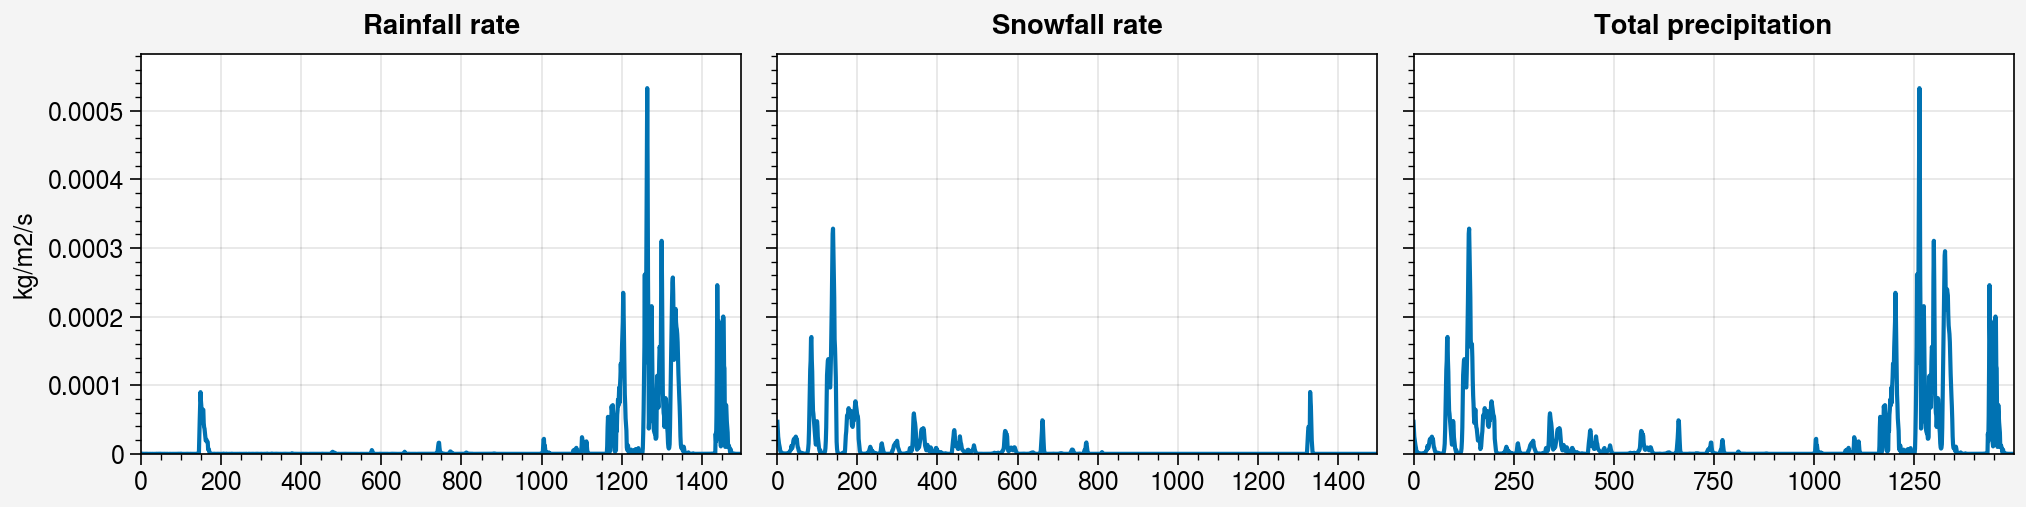

In [14]:
%matplotlib inline
fig, axs = pplt.subplots(ncols=3, nrows=1, refaspect=1.5, refwidth=3)

i_start = 3500
i_end = 5000

axs[0].plot(ds.Rainf.squeeze().values[i_start:i_end])
axs[1].plot(ds.Snowf.squeeze().values[i_start:i_end])
axs[2].plot(ds.Rainf.squeeze().values[i_start:i_end] + ds.Snowf.squeeze().values[i_start:i_end])

for ax in axs:
    ax.format(
        ylabel=ds.Rainf.attrs['units'], 
        ylim=(0,max(ds.Rainf.squeeze().values[i_start:i_end] + ds.Snowf.squeeze().values[i_start:i_end]).item(0) + 0.00005)
    )
    
axs.format(
    collabels=[ds.Rainf.attrs['long_name'], ds.Snowf.attrs['long_name'], 'Total precipitation']
)


In [15]:
ds['TotPrecip'] = ds.Rainf + ds.Snowf
ds.TotPrecip.attrs['long_name'] = 'Total precipitaion rate (Rainf + Snowf)'
ds.TotPrecip.attrs['units'] = ds.Rainf.attrs['units']
ds

<xarray.Dataset>
Dimensions:    (time: 43824, lat: 1, lon: 1)
Coordinates:
  * time       (time) float64 2.014e+07 2.014e+07 ... 2.018e+07 2.018e+07
  * lon        (lon) float64 -80.0
  * lat        (lat) float64 73.15
Data variables:
    Wind       (time, lat, lon) float64 0.134 0.076 0.02 ... 1.327 1.632 0.369
    Tair       (time, lat, lon) float64 -39.72 -39.27 -37.01 ... -25.13 -28.13
    Qair       (time, lat, lon) float64 7.51e-05 7.82e-05 ... 0.0002744
    LWdown     (time, lat, lon) float64 162.2 162.3 165.5 ... 189.1 192.6 170.2
    SWdown     (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Psurf      (time, lat, lon) float64 1.012e+05 1.012e+05 ... 1.011e+05
    Rainf      (time, lat, lon) float32 1.64e-08 -7.189e-08 ... 8.844e-08
    Snowf      (time, lat, lon) float32 6.403e-07 7.285e-07 ... 7.065e-07
    TotPrecip  (time, lat, lon) float32 6.566e-07 6.566e-07 ... 7.949e-07
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Feb 06 13:43:22 2024: cdo -a -f nc copy /home/lalandmi/...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

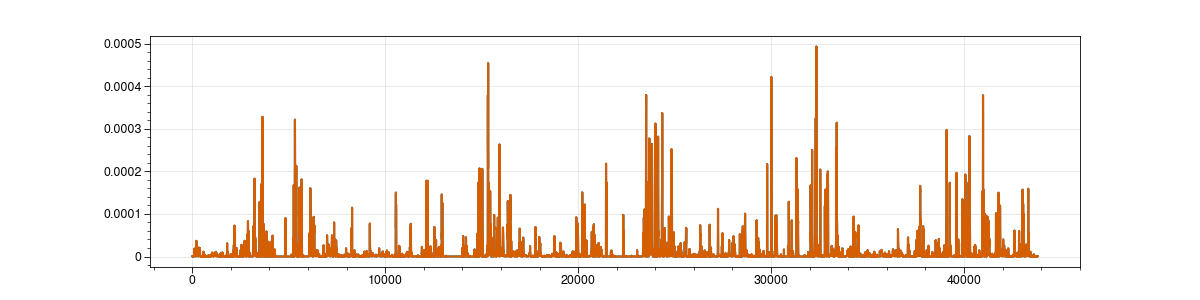

In [16]:
%matplotlib widget
plt.figure(figsize=(12,3))
plt.plot(ds.Snowf[:, 0, 0].values)
plt.plot(( ds_ERA5.sf/3600*1e3 ).sel(latitude=lat, longitude=lon, method='nearest').values)

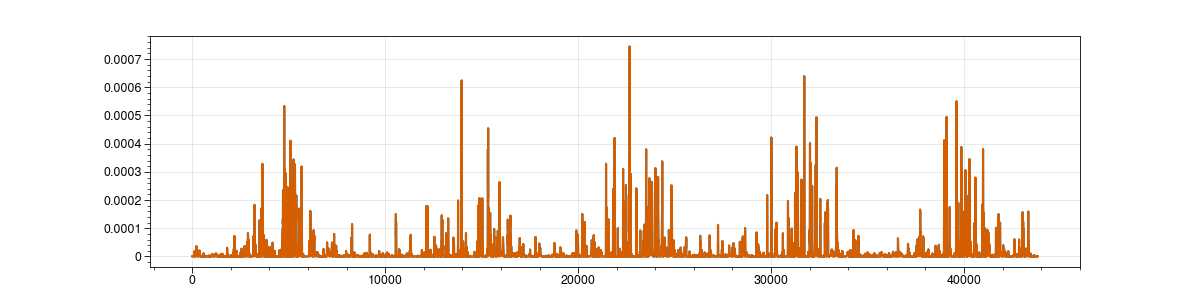

In [17]:
%matplotlib widget
plt.figure(figsize=(12,3))
plt.plot(ds.TotPrecip[:, 0, 0].values)
plt.plot(( ds_ERA5.tp/3600*1e3 ).sel(latitude=lat, longitude=lon, method='nearest').values)

## Save forcing files

CLASSIC **requires** <mark>one file per forcing variable</mark>

Note: I save the files directly to CLASSIC folder and here to keep more flexibility in the future

In [18]:
for key in list(ds.keys()):
    ds[key].to_netcdf(path_out+'/met_insitu_'+site+'_ERA5precip_'+year_start_full+'_'+year_end_full+'_'+key+'.nc')
    ds[key].to_netcdf(path_out_CLASSIC+'/met_insitu_'+site+'_ERA5precip_'+year_start_full+'_'+year_end_full+'_'+key+'.nc')

In [19]:
!ls {path_out}

met_insitu_byl_1.3SWd_2014_2018_LWdown.nc
met_insitu_byl_1.3SWd_2014_2018_Psurf.nc
met_insitu_byl_1.3SWd_2014_2018_Qair.nc
met_insitu_byl_1.3SWd_2014_2018_Rainf.nc
met_insitu_byl_1.3SWd_2014_2018_Snowf.nc
met_insitu_byl_1.3SWd_2014_2018_SWdown.nc
met_insitu_byl_1.3SWd_2014_2018_Tair.nc
met_insitu_byl_1.3SWd_2014_2018_TotPrecip.nc
met_insitu_byl_1.3SWd_2014_2018_Wind.nc
met_insitu_byl_2014_2018_LWdown.nc
met_insitu_byl_2014_2018_Psurf.nc
met_insitu_byl_2014_2018_Qair.nc
met_insitu_byl_2014_2018_Rainf.nc
met_insitu_byl_2014_2018_Snowf.nc
met_insitu_byl_2014_2018_SWdown.nc
met_insitu_byl_2014_2018_Tair.nc
met_insitu_byl_2014_2018_TotPrecip.nc
met_insitu_byl_2014_2018_Wind.nc
met_insitu_byl_30min_2014_2018_LWdown.nc
met_insitu_byl_30min_2014_2018_Psurf.nc
met_insitu_byl_30min_2014_2018_Qair.nc
met_insitu_byl_30min_2014_2018_Rainf.nc
met_insitu_byl_30min_2014_2018_Snowf.nc
met_insitu_byl_30min_2014_2018_SWdown.nc
met_insitu_byl_30min_2014_2018_Tair.nc
met_insitu_byl_30min_2014_2018_TotPreci

In [20]:
!ls {path_out_CLASSIC}

met_insitu_byl_1.3SWd_2014_2018_LWdown.nc
met_insitu_byl_1.3SWd_2014_2018_Psurf.nc
met_insitu_byl_1.3SWd_2014_2018_Qair.nc
met_insitu_byl_1.3SWd_2014_2018_Rainf.nc
met_insitu_byl_1.3SWd_2014_2018_Snowf.nc
met_insitu_byl_1.3SWd_2014_2018_SWdown.nc
met_insitu_byl_1.3SWd_2014_2018_Tair.nc
met_insitu_byl_1.3SWd_2014_2018_TotPrecip.nc
met_insitu_byl_1.3SWd_2014_2018_Wind.nc
met_insitu_byl_2014_2018_LWdown.nc
met_insitu_byl_2014_2018_Psurf.nc
met_insitu_byl_2014_2018_Qair.nc
met_insitu_byl_2014_2018_Rainf.nc
met_insitu_byl_2014_2018_Snowf.nc
met_insitu_byl_2014_2018_SWdown.nc
met_insitu_byl_2014_2018_Tair.nc
met_insitu_byl_2014_2018_TotPrecip.nc
met_insitu_byl_2014_2018_Wind.nc
met_insitu_byl_30min_2014_2018_LWdown.nc
met_insitu_byl_30min_2014_2018_Psurf.nc
met_insitu_byl_30min_2014_2018_Qair.nc
met_insitu_byl_30min_2014_2018_Rainf.nc
met_insitu_byl_30min_2014_2018_Snowf.nc
met_insitu_byl_30min_2014_2018_SWdown.nc
met_insitu_byl_30min_2014_2018_Tair.nc
met_insitu_byl_30min_2014_2018_TotPreci

In [28]:
path_init = '/home/lalandmi/eccc/classic-develop/inputFiles/SnowArctic/'+site
exp2 = 'ERA5precip'
!cp {path_init}/{site}_init_run_Ref.nc {path_init}/{site}_init_run_{exp2}.nc
!cp {path_init}/rsfile_run_Ref.nc {path_init}/rsfile_run_{exp2}.nc


In [29]:
!mkdir /home/lalandmi/eccc/classic-develop/outputFiles/SnowArctic/{site}/run_{exp2}